## Jupyter Notebook for HW1
April 19th, 2024

## Data Description

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read the data file
data = pd.read_stata("Data.dta")

# Display basic information about the dataset
print(f"Number of observations: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]}")

# Create summary statistics table for key variables
print("Summary statistics for key variables:")
summary_vars = ['treatment', 'control', 'gave', 'amount', 'hpa', 'freq', 'years', 'mrm2', 'dormant', 'female', 'couple']
print(data[summary_vars].describe())

# Count by treatment group
treatment_count = data['treatment'].sum()
control_count = data['control'].sum()
print(f"\nTreatment group size: {treatment_count} ({treatment_count/len(data)*100:.1f}%)")
print(f"Control group size: {control_count} ({control_count/len(data)*100:.1f}%)")

# Break down the match ratios
ratio_counts = data[data['treatment']==1].groupby(['ratio']).size()
print("\nMatch ratio distribution:")
print(ratio_counts)

# Break down match threshold sizes
size_counts = data[data['treatment']==1].groupby(['size']).size()
print("\nMatch threshold distribution:")
print(size_counts)

# Create Table 1-style summary to verify randomization
print("\nSummary statistics by treatment group:")
table1_vars = ['mrm2', 'hpa', 'freq', 'years', 'dormant', 'female', 'couple', 'pwhite', 'pblack', 'page18_39', 'ave_hh_sz']
table1 = data.groupby(['treatment'])[table1_vars].mean()
print(table1)

Number of observations: 50083
Number of variables: 51
Summary statistics for key variables:
          treatment       control          gave        amount           hpa  \
count  50083.000000  50083.000000  50083.000000  50083.000000  50083.000000   
mean       0.666813      0.333187      0.020646      0.915694     59.384975   
std        0.471357      0.471357      0.142197      8.707393     71.179871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000     30.000000   
50%        1.000000      0.000000      0.000000      0.000000     45.000000   
75%        1.000000      1.000000      0.000000      0.000000     60.000000   
max        1.000000      1.000000      1.000000    400.000000   1000.000000   

               freq         years          mrm2       dormant        female  \
count  50083.000000  50082.000000  50082.000000  50083.000000  48972.000000   
mean       8.039355      6.097540     

/tmp/ipykernel_86215/859292995.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_counts = data[data['treatment']==1].groupby(['ratio']).size()
/tmp/ipykernel_86215/859292995.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_counts = data[data['treatment']==1].groupby(['size']).size()


### Variable Definitions

| Variable             | Description                                                         |
|----------------------|---------------------------------------------------------------------|
| `treatment`          | Treatment                                                           |
| `control`            | Control                                                             |
| `ratio`              | Match ratio                                                         |
| `ratio2`             | 2:1 match ratio                                                     |
| `ratio3`             | 3:1 match ratio                                                     |
| `size`               | Match threshold                                                     |
| `size25`             | \$25,000 match threshold                                            |
| `size50`             | \$50,000 match threshold                                            |
| `size100`            | \$100,000 match threshold                                           |
| `sizeno`             | Unstated match threshold                                            |
| `ask`                | Suggested donation amount                                           |
| `askd1`              | Suggested donation was highest previous contribution                |
| `askd2`              | Suggested donation was 1.25 x highest previous contribution         |
| `askd3`              | Suggested donation was 1.50 x highest previous contribution         |
| `ask1`               | Highest previous contribution (for suggestion)                      |
| `ask2`               | 1.25 x highest previous contribution (for suggestion)               |
| `ask3`               | 1.50 x highest previous contribution (for suggestion)               |
| `amount`             | Dollars given                                                       |
| `gave`               | Gave anything                                                       |
| `amountchange`       | Change in amount given                                              |
| `hpa`                | Highest previous contribution                                       |
| `ltmedmra`           | Small prior donor: last gift was less than median \$35              |
| `freq`               | Number of prior donations                                           |
| `years`              | Number of years since initial donation                              |
| `year5`              | At least 5 years since initial donation                             |
| `mrm2`               | Number of months since last donation                                |
| `dormant`            | Already donated in 2005                                             |
| `female`             | Female                                                              |
| `couple`             | Couple                                                              |
| `state50one`         | State tag: 1 for one observation of each of 50 states; 0 otherwise  |
| `nonlit`             | Nonlitigation                                                       |
| `cases`              | Court cases from state in 2004-5 in which organization was involved |
| `statecnt`           | Percent of sample from state                                        |
| `stateresponse`      | Proportion of sample from the state who gave                        |
| `stateresponset`     | Proportion of treated sample from the state who gave                |
| `stateresponsec`     | Proportion of control sample from the state who gave                |
| `stateresponsetminc` | stateresponset - stateresponsec                                     |
| `perbush`            | State vote share for Bush                                           |
| `close25`            | State vote share for Bush between 47.5% and 52.5%                   |
| `red0`               | Red state                                                           |
| `blue0`              | Blue state                                                          |
| `redcty`             | Red county                                                          |
| `bluecty`            | Blue county                                                         |
| `pwhite`             | Proportion white within zip code                                    |
| `pblack`             | Proportion black within zip code                                    |
| `page18_39`          | Proportion age 18-39 within zip code                                |
| `ave_hh_sz`          | Average household size within zip code                              |
| `median_hhincome`    | Median household income within zip code                             |
| `powner`             | Proportion house owner within zip code                              |
| `psch_atlstba`       | Proportion who finished college within zip code                     |
| `pop_propurban`      | Proportion of population urban within zip code                      |

::::

## Balance Tests

In [2]:
# Create a function to run balance tests for a given variable
def run_balance_test(data, variable_name):
    # Extract data for the two groups
    treat_data = data[data['treatment'] == 1][variable_name].dropna()
    control_data = data[data['control'] == 1][variable_name].dropna()
    
    # Calculate means
    mean_treat = treat_data.mean()
    mean_control = control_data.mean()
    diff = mean_treat - mean_control
    
    print(f"\n--- Testing {variable_name} ---")
    print(f"Mean for treatment group: {mean_treat:.3f}")
    print(f"Mean for control group: {mean_control:.3f}")
    print(f"Difference: {diff:.3f}")
    
    # Calculate sample sizes and variances
    n_treat = len(treat_data)
    n_control = len(control_data)
    var_treat = treat_data.var()
    var_control = control_data.var()
    
    # Manual t-test using the formula from class slides
    # t = (mean1 - mean2) / sqrt(var1/n1 + var2/n2)
    t_stat = diff / np.sqrt(var_treat/n_treat + var_control/n_control)
    
    # Calculate p-value (two-tailed test)
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=min(n_treat, n_control)-1))
    
    print(f"\nT-test results:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Statistically significant at 95% level: {p_value < 0.05}")
    
    # Linear regression approach
    X = sm.add_constant(data['treatment'])
    model = sm.OLS(data[variable_name], X).fit()
    
    print("\nRegression results:")
    print(f"Coefficient on treatment: {model.params[1]:.4f}")
    print(f"t-statistic: {model.tvalues[1]:.4f}")
    print(f"p-value: {model.pvalues[1]:.4f}")
    print(f"Statistically significant at 95% level: {model.pvalues[1] < 0.05}")
    
    # Verify that regression coefficient equals difference in means
    print(f"\nVerification:")
    print(f"Regression coefficient ({model.params[1]:.4f}) = difference in means ({diff:.4f})")
    print(f"Regression t-stat ({model.tvalues[1]:.4f}) = manual t-stat ({t_stat:.4f})")
    
    # Return results for summary table
    return {
        'Variable': variable_name,
        'Treatment Mean': mean_treat,
        'Control Mean': mean_control, 
        'Difference': diff,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Significant at 95%': p_value < 0.05
    }

# List of variables to test
variables_to_test = ['mrm2', 'hpa', 'freq', 'years', 'dormant', 'female', 'couple']

# Run balance tests for each variable
results = []
for var in variables_to_test:
    results.append(run_balance_test(data, var))

# Create a summary table of all results
balance_table = pd.DataFrame(results)
print("\n--- Summary of Balance Tests ---")
print(balance_table.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Check if any variables show significant differences
sig_vars = balance_table[balance_table['Significant at 95%'] == True]
if len(sig_vars) == 0:
    print("\nNone of the tested variables show statistically significant differences between treatment and control groups.")
    print("This suggests that the randomization was successful.")
else:
    print(f"\n{len(sig_vars)} variables show statistically significant differences between groups:")
    print(sig_vars['Variable'].tolist())
    print("This may indicate potential issues with the randomization process.")


--- Testing mrm2 ---
Mean for treatment group: 13.012
Mean for control group: 12.998
Difference: 0.014

T-test results:
t-statistic: 0.1195
p-value: 0.9049
Statistically significant at 95% level: False

Regression results:
Coefficient on treatment: nan
t-statistic: nan
p-value: nan
Statistically significant at 95% level: False

Verification:
Regression coefficient (nan) = difference in means (0.0137)
Regression t-stat (nan) = manual t-stat (0.1195)

--- Testing hpa ---
Mean for treatment group: 59.597
Mean for control group: 58.960
Difference: 0.637

T-test results:
t-statistic: 0.9704
p-value: 0.3319
Statistically significant at 95% level: False

Regression results:
Coefficient on treatment: 0.6371
t-statistic: 0.9441
p-value: 0.3451
Statistically significant at 95% level: False

Verification:
Regression coefficient (0.6371) = difference in means (0.6371)
Regression t-stat (0.9441) = manual t-stat (0.9704)

--- Testing freq ---
Mean for treatment group: 8.035
Mean for control group: 

/tmp/ipykernel_86215/3282780960.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coefficient on treatment: {model.params[1]:.4f}")
/tmp/ipykernel_86215/3282780960.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"t-statistic: {model.tvalues[1]:.4f}")
/tmp/ipykernel_86215/3282780960.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value: {model.pvalues[1]:.4f}")
/tmp/ipykernel_86215/3282780960.py:

## Experimental Results

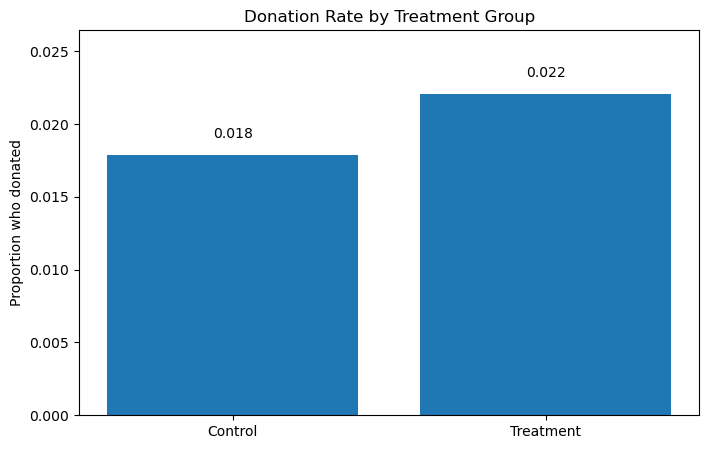

T-test results for donation rate:
Treatment mean: 0.0220
Control mean: 0.0179
Difference: 0.0042
t-statistic: 3.2095
p-value: 0.0013

Linear regression results for donation rate:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      0.001     16.225      0.000       0.016       0.020
treatment      0.0042      0.001      3.101      0.002       0.002       0.007
Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7

Probit regression results for donation rate:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.028      3.113      0.002       0.032       0.141

Marginal effect at mean:
0.0043132115796

In [3]:
# Calculate proportion who donated in each group
gave_by_treatment = data.groupby('treatment')['gave'].mean()
control_gave_rate = gave_by_treatment[0]
treatment_gave_rate = gave_by_treatment[1]

# Create barplot
plt.figure(figsize=(8, 5))
bars = plt.bar(['Control', 'Treatment'], [control_gave_rate, treatment_gave_rate])
plt.ylabel('Proportion who donated')
plt.title('Donation Rate by Treatment Group')
plt.ylim(0, max(control_gave_rate, treatment_gave_rate) * 1.2)

# Add text labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom')

plt.savefig('donation_rate.png')
plt.show()

# Run t-test on binary outcome of gave
gave_treat = data[data['treatment'] == 1]['gave']
gave_control = data[data['control'] == 1]['gave']

# Calculate means, sample sizes, and variances
mean_treat = gave_treat.mean()
mean_control = gave_control.mean()
diff = mean_treat - mean_control
n_treat = len(gave_treat)
n_control = len(gave_control)
var_treat = gave_treat.var()
var_control = gave_control.var()

# Calculate t-statistic and p-value
t_stat = diff / np.sqrt(var_treat/n_treat + var_control/n_control)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=min(n_treat, n_control)-1))

print("T-test results for donation rate:")
print(f"Treatment mean: {mean_treat:.4f}")
print(f"Control mean: {mean_control:.4f}")
print(f"Difference: {diff:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Run bivariate linear regression
model_gave = sm.OLS(data['gave'], sm.add_constant(data['treatment'])).fit()
print("\nLinear regression results for donation rate:")
print(model_gave.summary().tables[1])

# Run probit regression
probit_model = sm.Probit(data['gave'], sm.add_constant(data['treatment'])).fit()
print("\nProbit regression results for donation rate:")
print(probit_model.summary().tables[1])

# Calculate marginal effect at the mean for comparison with Table 3
try:
    marginal_effect = probit_model.get_margeff()
    print("\nMarginal effect at mean:")
    print(marginal_effect.summary_frame(alpha=0.05)['dy/dx']['treatment'])
except:
    # Option 2: Calculate manually
    from scipy.stats import norm
    
    # Get the coefficients
    beta = probit_model.params
    
    # Calculate Xβ
    X = sm.add_constant(data['treatment'])
    xb = X.dot(beta)
    
    # Calculate the PDF at the mean of Xβ
    pdf_mean = norm.pdf(xb.mean())
    
    # Marginal effect is PDF × coefficient
    me_treatment = pdf_mean * beta['treatment']
    
    print("\nManually calculated marginal effect at mean:")
    print(f"Treatment: {me_treatment:.4f}")

In [4]:
# Create binary indicators for match ratios
data['ratio1'] = ((data['treatment'] == 1) & (data['ratio'] == 1)).astype(int)
data['ratio2'] = ((data['treatment'] == 1) & (data['ratio'] == 2)).astype(int)
data['ratio3'] = ((data['treatment'] == 1) & (data['ratio'] == 3)).astype(int)

# Calculate response rates by match ratio
gave_by_ratio = {
    'control': data[data['control'] == 1]['gave'].mean(),
    '1:1': data[data['ratio1'] == 1]['gave'].mean(),
    '2:1': data[data['ratio2'] == 1]['gave'].mean(),
    '3:1': data[data['ratio3'] == 1]['gave'].mean()
}

print("\nDonation rate by match ratio:")
for group, rate in gave_by_ratio.items():
    print(f"{group}: {rate:.4f}")

# Run t-tests between different match ratios
print("\nT-tests comparing match ratios:")

# 1:1 vs 2:1
ratio1_gave = data[data['ratio1'] == 1]['gave']
ratio2_gave = data[data['ratio2'] == 1]['gave']
t_stat_1v2, p_val_1v2 = stats.ttest_ind(ratio1_gave, ratio2_gave, equal_var=False)
print(f"1:1 vs 2:1: t-stat = {t_stat_1v2:.4f}, p-value = {p_val_1v2:.4f}")

# 2:1 vs 3:1
ratio3_gave = data[data['ratio3'] == 1]['gave']
t_stat_2v3, p_val_2v3 = stats.ttest_ind(ratio2_gave, ratio3_gave, equal_var=False)
print(f"2:1 vs 3:1: t-stat = {t_stat_2v3:.4f}, p-value = {p_val_2v3:.4f}")

# 1:1 vs 3:1
t_stat_1v3, p_val_1v3 = stats.ttest_ind(ratio1_gave, ratio3_gave, equal_var=False)
print(f"1:1 vs 3:1: t-stat = {t_stat_1v3:.4f}, p-value = {p_val_1v3:.4f}")

# Run regression of gave on ratio dummies
X_ratio = sm.add_constant(data[['ratio1', 'ratio2', 'ratio3']])
model_ratio = sm.OLS(data['gave'], X_ratio).fit()
print("\nRegression results for match ratio effects:")
print(model_ratio.summary().tables[1])

# Calculate response rate differences directly from data
diff_1v2 = gave_by_ratio['2:1'] - gave_by_ratio['1:1']
diff_2v3 = gave_by_ratio['3:1'] - gave_by_ratio['2:1']

print("\nResponse rate differences from raw data:")
print(f"Difference between 1:1 and 2:1: {diff_1v2:.4f}")
print(f"Difference between 2:1 and 3:1: {diff_2v3:.4f}")

# Calculate differences from regression coefficients
diff_1v2_coef = model_ratio.params['ratio2'] - model_ratio.params['ratio1']
diff_2v3_coef = model_ratio.params['ratio3'] - model_ratio.params['ratio2']

print("\nResponse rate differences from regression coefficients:")
print(f"Difference between 1:1 and 2:1: {diff_1v2_coef:.4f}")
print(f"Difference between 2:1 and 3:1: {diff_2v3_coef:.4f}")


Donation rate by match ratio:
control: 0.0179
1:1: 0.0207
2:1: 0.0226
3:1: 0.0227

T-tests comparing match ratios:
1:1 vs 2:1: t-stat = -0.9650, p-value = 0.3345
2:1 vs 3:1: t-stat = -0.0501, p-value = 0.9600
1:1 vs 3:1: t-stat = -1.0150, p-value = 0.3101

Regression results for match ratio effects:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      0.001     16.225      0.000       0.016       0.020
ratio1         0.0029      0.002      1.661      0.097      -0.001       0.006
ratio2         0.0048      0.002      2.744      0.006       0.001       0.008
ratio3         0.0049      0.002      2.802      0.005       0.001       0.008

Response rate differences from raw data:
Difference between 1:1 and 2:1: 0.0019
Difference between 2:1 and 3:1: 0.0001

Response rate differences from regression coefficients:
Difference between 1:1 and 2:1: 0.0019
Differen


T-test results for donation amount:
Treatment mean: $0.97
Control mean: $0.81
Difference: $0.15
t-statistic: 1.9182
p-value: 0.0551

Regression results for donation amount:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8133      0.067     12.063      0.000       0.681       0.945
treatment      0.1536      0.083      1.861      0.063      -0.008       0.315

Conditional on positive donation:
Treatment mean: $43.87
Control mean: $45.54
Difference: $-1.67
t-statistic: -0.5846
p-value: 0.5590

Regression results for conditional donation amount:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5403      2.423     18.792      0.000      40.785      50.296
treatment     -1.6684      2.872     -0.581      0.561      -7.305       3.968


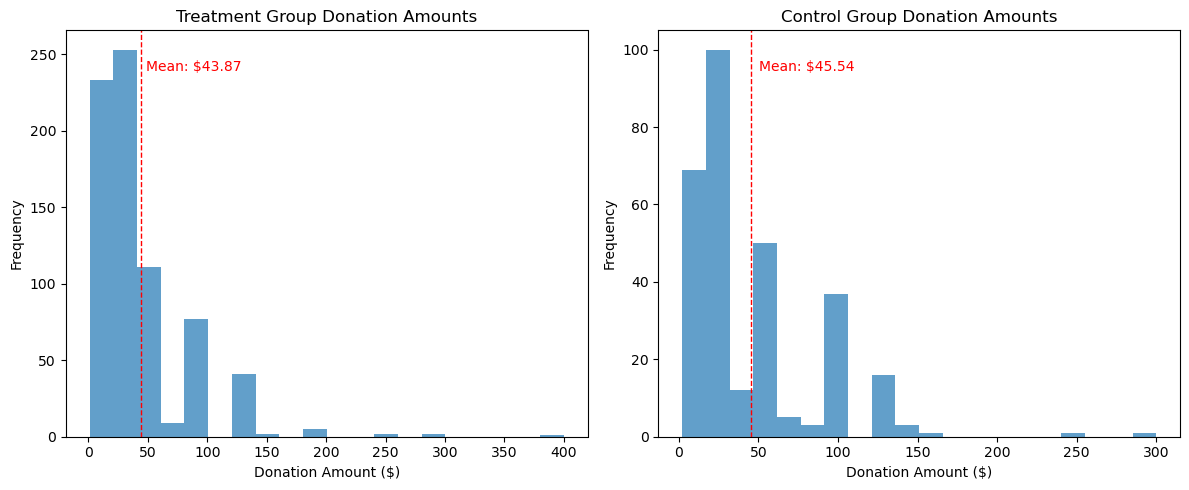

In [5]:
# Run a t-test on donation amount by treatment status
amount_treat = data[data['treatment'] == 1]['amount']
amount_control = data[data['control'] == 1]['amount']

# Calculate means and run t-test
mean_amount_treat = amount_treat.mean()
mean_amount_control = amount_control.mean()
diff_amount = mean_amount_treat - mean_amount_control

# Calculate t-statistic and p-value
t_stat_amount = diff_amount / np.sqrt(amount_treat.var()/len(amount_treat) + amount_control.var()/len(amount_control))
p_value_amount = 2 * (1 - stats.t.cdf(abs(t_stat_amount), df=min(len(amount_treat), len(amount_control))-1))

print("\nT-test results for donation amount:")
print(f"Treatment mean: ${mean_amount_treat:.2f}")
print(f"Control mean: ${mean_amount_control:.2f}")
print(f"Difference: ${diff_amount:.2f}")
print(f"t-statistic: {t_stat_amount:.4f}")
print(f"p-value: {p_value_amount:.4f}")

# Run bivariate regression of amount on treatment
model_amount = sm.OLS(data['amount'], sm.add_constant(data['treatment'])).fit()
print("\nRegression results for donation amount:")
print(model_amount.summary().tables[1])

# Analysis conditional on positive donation
# Filter to only include donors who gave
donors_only = data[data['gave'] == 1]

# Calculate conditional means
cond_mean_treat = donors_only[donors_only['treatment'] == 1]['amount'].mean()
cond_mean_control = donors_only[donors_only['control'] == 1]['amount'].mean()
cond_diff = cond_mean_treat - cond_mean_control

# Run t-test on conditional donation amounts
cond_amount_treat = donors_only[donors_only['treatment'] == 1]['amount']
cond_amount_control = donors_only[donors_only['control'] == 1]['amount']
t_stat_cond, p_val_cond = stats.ttest_ind(cond_amount_treat, cond_amount_control, equal_var=False)

print("\nConditional on positive donation:")
print(f"Treatment mean: ${cond_mean_treat:.2f}")
print(f"Control mean: ${cond_mean_control:.2f}")
print(f"Difference: ${cond_diff:.2f}")
print(f"t-statistic: {t_stat_cond:.4f}")
print(f"p-value: {p_val_cond:.4f}")

# Run regression on conditional amounts
model_cond = sm.OLS(donors_only['amount'], sm.add_constant(donors_only['treatment'])).fit()
print("\nRegression results for conditional donation amount:")
print(model_cond.summary().tables[1])

# Create histograms of donation amounts by group (among donors)
plt.figure(figsize=(12, 5))

# Treatment group
plt.subplot(1, 2, 1)
plt.hist(cond_amount_treat, bins=20, alpha=0.7)
plt.axvline(x=cond_mean_treat, color='r', linestyle='dashed', linewidth=1)
plt.text(cond_mean_treat*1.1, plt.ylim()[1]*0.9, f'Mean: ${cond_mean_treat:.2f}', color='r')
plt.title('Treatment Group Donation Amounts')
plt.xlabel('Donation Amount ($)')
plt.ylabel('Frequency')

# Control group
plt.subplot(1, 2, 2)
plt.hist(cond_amount_control, bins=20, alpha=0.7)
plt.axvline(x=cond_mean_control, color='r', linestyle='dashed', linewidth=1)
plt.text(cond_mean_control*1.1, plt.ylim()[1]*0.9, f'Mean: ${cond_mean_control:.2f}', color='r')
plt.title('Control Group Donation Amounts')
plt.xlabel('Donation Amount ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('donation_amounts.png')
plt.show()

## Simulation Experiments

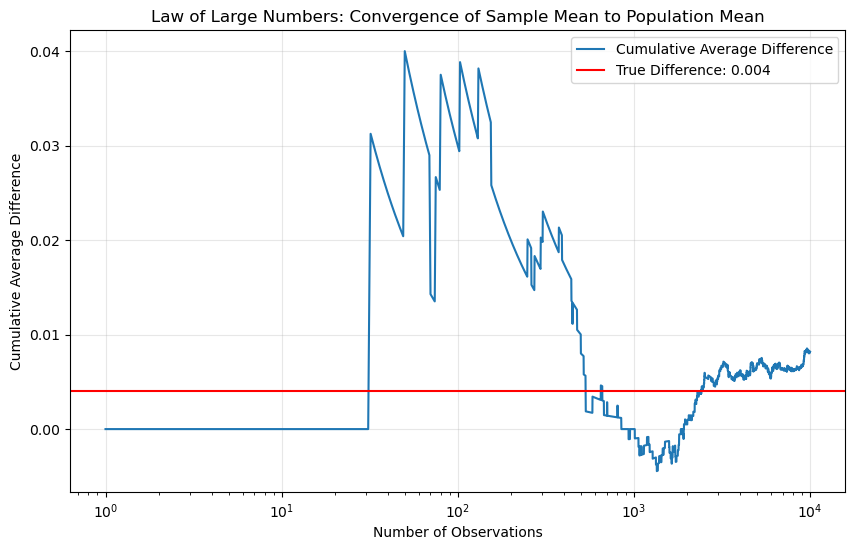

Final cumulative average after 10000 draws: 0.008200
True difference: 0.004
Absolute error: 0.004200


In [6]:
np.random.seed(42)

# Define true probabilities
p_control = 0.018
p_treatment = 0.022
true_diff = p_treatment - p_control

# Simulate 10,000 draws from each distribution
n_draws = 10000
control_draws = np.random.binomial(1, p_control, n_draws)
treatment_draws = np.random.binomial(1, p_treatment, n_draws)

# Calculate differences
differences = treatment_draws - control_draws

# Calculate cumulative average
cumulative_avg = np.cumsum(differences) / np.arange(1, n_draws + 1)

# Plot the cumulative average
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_draws + 1), cumulative_avg, label='Cumulative Average Difference')
plt.axhline(y=true_diff, color='r', linestyle='-', label=f'True Difference: {true_diff}')
plt.xscale('log')  # Log scale to better show convergence
plt.xlabel('Number of Observations')
plt.ylabel('Cumulative Average Difference')
plt.title('Law of Large Numbers: Convergence of Sample Mean to Population Mean')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('law_of_large_numbers.png')
plt.show()

# Print final cumulative average
print(f"Final cumulative average after {n_draws} draws: {cumulative_avg[-1]:.6f}")
print(f"True difference: {true_diff}")
print(f"Absolute error: {abs(cumulative_avg[-1] - true_diff):.6f}")

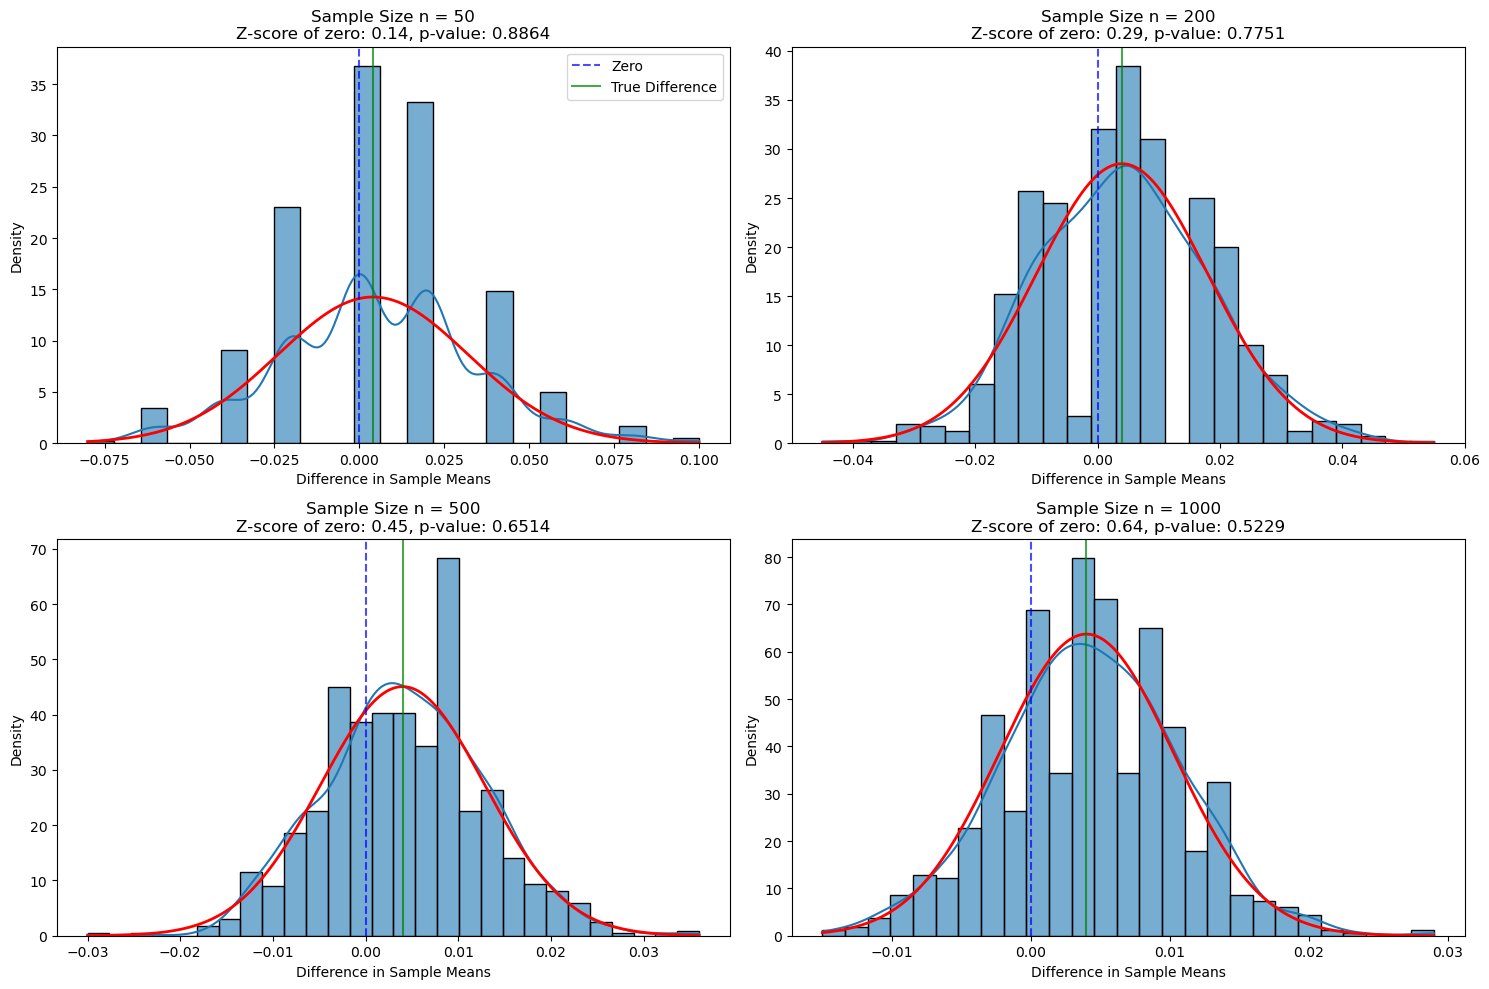

Sample size 50: Proportion of simulations with difference <= 0: 0.5980
Sample size 200: Proportion of simulations with difference <= 0: 0.4560
Sample size 500: Proportion of simulations with difference <= 0: 0.3530
Sample size 1000: Proportion of simulations with difference <= 0: 0.3020


In [7]:
# Sample sizes to demonstrate CLT
sample_sizes = [50, 200, 500, 1000]
n_simulations = 1000

# Create a figure for all histograms
plt.figure(figsize=(15, 10))

# For each sample size
for i, n in enumerate(sample_sizes):
    # Storage for sample means
    sample_diffs = np.zeros(n_simulations)
    
    # Perform many simulations
    for j in range(n_simulations):
        # Draw samples from control and treatment
        control_sample = np.random.binomial(1, p_control, n)
        treatment_sample = np.random.binomial(1, p_treatment, n)
        
        # Calculate and store the difference in means
        control_mean = np.mean(control_sample)
        treatment_mean = np.mean(treatment_sample)
        sample_diffs[j] = treatment_mean - control_mean
    
    # Calculate theoretical parameters for normal approximation
    mean_diff = p_treatment - p_control
    se_diff = np.sqrt((p_treatment * (1 - p_treatment) + p_control * (1 - p_control)) / n)
    
    # Create histogram subplot
    plt.subplot(2, 2, i + 1)
    sns.histplot(sample_diffs, kde=True, stat='density', alpha=0.6)
    
    # Add normal curve
    x = np.linspace(min(sample_diffs), max(sample_diffs), 1000)
    plt.plot(x, stats.norm.pdf(x, mean_diff, se_diff), 'r-', linewidth=2)
    
    # Add vertical lines for zero and true difference
    plt.axvline(x=0, color='blue', linestyle='--', alpha=0.7, label='Zero')
    plt.axvline(x=mean_diff, color='green', linestyle='-', alpha=0.7, label='True Difference')
    
    # Calculate how many standard deviations zero is from the mean
    z_score = abs(mean_diff) / se_diff
    p_value = 2 * (1 - stats.norm.cdf(z_score))  # Two-tailed p-value
    
    # Add plot details
    plt.title(f'Sample Size n = {n}\nZ-score of zero: {z_score:.2f}, p-value: {p_value:.4f}')
    plt.xlabel('Difference in Sample Means')
    plt.ylabel('Density')
    
    if i == 0:  # Only add legend to first plot
        plt.legend()

plt.tight_layout()
plt.savefig('central_limit_theorem.png')
plt.show()

# Calculate proportion of simulations where difference is less than or equal to zero
for n in sample_sizes:
    control_means = np.array([np.mean(np.random.binomial(1, p_control, n)) for _ in range(n_simulations)])
    treatment_means = np.array([np.mean(np.random.binomial(1, p_treatment, n)) for _ in range(n_simulations)])
    diffs = treatment_means - control_means
    prop_below_zero = np.mean(diffs <= 0)
    
    print(f"Sample size {n}: Proportion of simulations with difference <= 0: {prop_below_zero:.4f}")